In [50]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.5429, 0.7577, 0.3635],
        [0.6378, 0.0492, 0.2370],
        [0.2734, 0.6412, 0.8273],
        [0.1175, 0.9954, 0.4790],
        [0.6432, 0.7306, 0.2157]])


In [51]:
print(x.size())

torch.Size([5, 3])


In [52]:
y = torch.rand(5, 3)
z = x + y
print(z)

tensor([[0.6829, 1.4811, 1.0966],
        [0.6864, 0.7895, 0.6822],
        [0.9123, 0.9137, 1.0481],
        [0.5805, 1.6261, 0.8343],
        [1.5576, 1.5928, 0.2686]])


In [53]:
t = x.numpy()
print(t)

[[0.54286534 0.75768477 0.36352652]
 [0.63779086 0.04918712 0.23699206]
 [0.27335745 0.641163   0.8272784 ]
 [0.11748272 0.9953671  0.47900957]
 [0.6431718  0.7306409  0.2157175 ]]


In [54]:
u = torch.from_numpy(t)
print(u)

tensor([[0.5429, 0.7577, 0.3635],
        [0.6378, 0.0492, 0.2370],
        [0.2734, 0.6412, 0.8273],
        [0.1175, 0.9954, 0.4790],
        [0.6432, 0.7306, 0.2157]])


In [55]:
import torch
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10
# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)
# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),)
loss_fn = torch.nn.MSELoss(reduction='sum')
# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algorithms. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)
    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()
    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()
    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

99 54.1969108581543
199 0.8444271087646484
299 0.004268445074558258
399 8.778043593338225e-06
499 7.6656929692831e-09


In [56]:
import torch
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out): #D_in: input layer, H: hidden layer, D_out: output layer
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)
    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred

In [57]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10
# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)
# Construct our model by instantiating the class defined above
model = TwoLayerNet(D_in, H, D_out)
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
for t in range(500):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)
    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

99 2.5458123683929443
199 0.06274399161338806
299 0.003221189836040139
399 0.00022065309167373925
499 1.7449408915126696e-05


In [238]:
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True, #for training
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                        batch_size=4, #process only 4 images at a time
                                        shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data',
                                        train=False, #not for training
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset,
batch_size=4, #process only 4 images at a time
shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


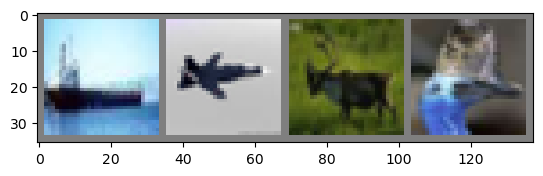

 ship plane  deer  bird


In [59]:
import matplotlib.pyplot as plt
import numpy as np
# function to show an image
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
# show images
imshow(torchvision.utils.make_grid(images))
# print true labels of the images
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [115]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #x = self.conv1(x), x = F.relu(x), x = self.pool(x)
        x = self.pool(F.relu(self.conv2(x))) #x = self.conv2(x), x = F.relu(x), x = self.pool(x)
        x = x.view(-1, 16 * 5 * 5) #flatten a 16x5x5 tensor to 16x5x5-dimensional vector
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [61]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

[1,  2000] loss: 2.239
[1,  4000] loss: 1.901
[1,  6000] loss: 1.706
[1,  8000] loss: 1.600
[1, 10000] loss: 1.512
[1, 12000] loss: 1.489
[2,  2000] loss: 1.423
[2,  4000] loss: 1.367
[2,  6000] loss: 1.345
[2,  8000] loss: 1.328
[2, 10000] loss: 1.302
[2, 12000] loss: 1.253
[3,  2000] loss: 1.198
[3,  4000] loss: 1.172
[3,  6000] loss: 1.212
[3,  8000] loss: 1.193
[3, 10000] loss: 1.167
[3, 12000] loss: 1.174
[4,  2000] loss: 1.085
[4,  4000] loss: 1.094
[4,  6000] loss: 1.094
[4,  8000] loss: 1.078
[4, 10000] loss: 1.121
[4, 12000] loss: 1.061
[5,  2000] loss: 1.006
[5,  4000] loss: 1.027
[5,  6000] loss: 1.011
[5,  8000] loss: 1.017
[5, 10000] loss: 1.036
[5, 12000] loss: 1.037
[6,  2000] loss: 0.923
[6,  4000] loss: 0.964
[6,  6000] loss: 0.965
[6,  8000] loss: 0.972
[6, 10000] loss: 0.957
[6, 12000] loss: 0.974
[7,  2000] loss: 0.886
[7,  4000] loss: 0.915
[7,  6000] loss: 0.906
[7,  8000] loss: 0.923
[7, 10000] loss: 0.939
[7, 12000] loss: 0.946
[8,  2000] loss: 0.814
[8,  4000] 

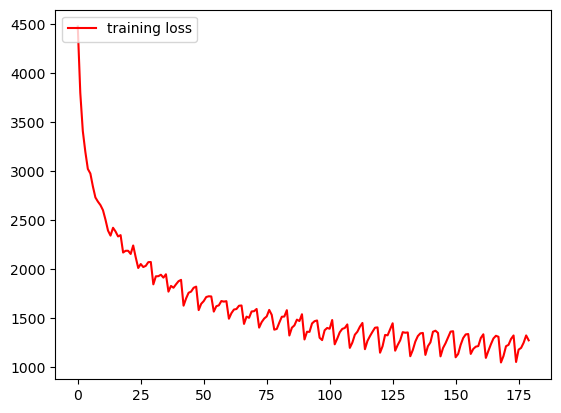

In [62]:
loss_history = []
epoch = 30
for e in range(epoch): # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
            (e + 1, i + 1, running_loss / 2000))
            loss_history.append(running_loss)
            running_loss = 0.0
print('Finished Training')
plt.plot(loss_history, label = 'training loss', color = 'r')
plt.legend(loc = "upper left")
plt.show()

In [107]:
PATH = './cifar_net.pth'
#torch.save(net.state_dict(), PATH)

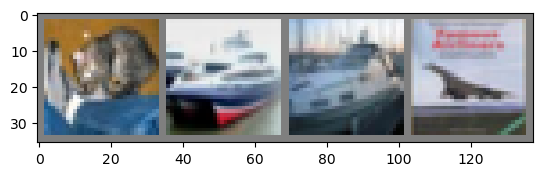

GroundTruth:    cat  ship  ship plane


In [111]:
dataiter = iter(testloader)
images, labels = next(dataiter)
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [112]:
#load the trained network
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

In [113]:
_, predicted_labels = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted_labels[j]] for j in range(4)))

Predicted:   frog  ship  ship plane


In [114]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, groundtruth_labels = data
        outputs = net(images)
        _, predicted_labels = torch.max(outputs.data, 1)
        total += groundtruth_labels.size(0)
        correct += (predicted_labels == groundtruth_labels).sum().item()
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 59 %


In [68]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, groundtruth_labels = data
        outputs = net(images)
        _, predicted_labels = torch.max(outputs, 1)
        c = (predicted_labels == groundtruth_labels).squeeze()
        for i in range(4):
            label = groundtruth_labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
    classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 69 %
Accuracy of   car : 79 %
Accuracy of  bird : 48 %
Accuracy of   cat : 45 %
Accuracy of  deer : 49 %
Accuracy of   dog : 39 %
Accuracy of  frog : 67 %
Accuracy of horse : 64 %
Accuracy of  ship : 66 %
Accuracy of truck : 65 %


#### Task 1

In [69]:
# Initialize class_correct and class_total
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# Initialize variables to store all ground truth and predicted labels
all_groundtruth_labels = []
all_predicted_labels = []

with torch.no_grad():
    for data in testloader:
        images, groundtruth_labels = data
        all_groundtruth_labels += groundtruth_labels
        outputs = net(images)
        _, predicted_labels = torch.max(outputs, 1)
        c = (predicted_labels == groundtruth_labels).squeeze()
        all_predicted_labels += predicted_labels
        for i in range(4):
            label = groundtruth_labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
# Calculate confusion matrix
confusion_matrix = np.zeros((10, 10), dtype=int)
for i in range(len(all_groundtruth_labels)):
    true_label = all_groundtruth_labels[i]
    predicted_label = all_predicted_labels[i]
    confusion_matrix[true_label][predicted_label] += 1

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[690  46  48  26  27  10   9  19  81  44]
 [ 35 796  21  12   6   8   8  10  35  69]
 [104   8 483 104 101  55  70  29  21  25]
 [ 36  24 106 459  75 114  72  54  26  34]
 [ 36   7 131 110 496  45  74  72  18  11]
 [ 23   9 101 265  64 391  34  74  18  21]
 [  5  18  80 117  57  26 670   7   6  14]
 [ 29  16  62  73  74  46  10 646  11  33]
 [168  53  13  26   9   4   8   7 667  45]
 [ 41 159  17  21   9   6  14  19  56 658]]


#### Task 2.1

In [219]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
transform = transforms.Compose([transforms.Resize((32,32)), # you can change the image size, but need to change the architecture accordingly
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = datasets.ImageFolder('C:\\Users\\User\\Desktop\\Class Folder\\Computer Vision\\FoodImages\\Train', transform=transform)
testset = datasets.ImageFolder('C:\\Users\\User\\Desktop\\Class Folder\\Computer Vision\\FoodImages\\Test', transform=transform)
classes = ('Cakes', 'Pasta', 'Pizza')
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

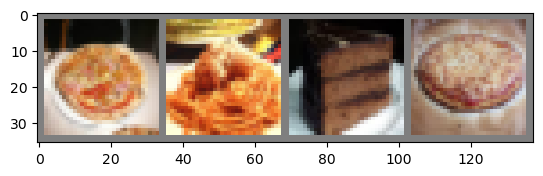

GroundTruth:  Pizza Pasta Cakes Pizza


In [220]:
dataiter = iter(testloader)
images, labels = next(dataiter)
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [221]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 3)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #x = self.conv1(x), x = F.relu(x), x = self.pool(x)
        x = self.pool(F.relu(self.conv2(x))) #x = self.conv2(x), x = F.relu(x), x = self.pool(x)
        x = x.view(-1, 16 * 5 * 5) #flatten a 16x5x5 tensor to 16x5x5-dimensional vector
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [222]:
PATH = './cifar_net.pth_3'
#load the trained network
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

In [223]:
_, predicted_labels = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted_labels[j]] for j in range(4)))

Predicted:  Pasta Pasta Pizza Pasta


In [224]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, groundtruth_labels = data
        outputs = net(images)
        _, predicted_labels = torch.max(outputs.data, 1)
        total += groundtruth_labels.size(0)
        correct += (predicted_labels == groundtruth_labels).sum().item()
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 67 %


In [79]:
class_correct = list(0. for i in range(3))
class_total = list(0. for i in range(3))
with torch.no_grad():
    for data in testloader:
        images, groundtruth_labels = data
        outputs = net(images)
        _, predicted_labels = torch.max(outputs, 1)
        c = (predicted_labels == groundtruth_labels).squeeze()
        for i in range(len(groundtruth_labels)):
            label = groundtruth_labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(3):
    print('Accuracy of %5s : %2d %%' % (
    classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Cakes : 66 %
Accuracy of Pasta : 73 %
Accuracy of Pizza : 63 %


In [80]:
# Initialize class_correct and class_total
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# Initialize variables to store all ground truth and predicted labels
all_groundtruth_labels = []
all_predicted_labels = []

with torch.no_grad():
    for data in testloader:
        images, groundtruth_labels = data
        all_groundtruth_labels += groundtruth_labels
        outputs = net(images)
        _, predicted_labels = torch.max(outputs, 1)
        c = (predicted_labels == groundtruth_labels).squeeze()
        all_predicted_labels += predicted_labels
        for i in range(len(groundtruth_labels)):
            label = groundtruth_labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
# Calculate confusion matrix
confusion_matrix = np.zeros((3, 3), dtype=int)
for i in range(len(all_groundtruth_labels)):
    true_label = all_groundtruth_labels[i]
    predicted_label = all_predicted_labels[i]
    confusion_matrix[true_label][predicted_label] += 1

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[20  8  2]
 [ 1 22  7]
 [ 0 11 19]]


#### Task 2.2

In [231]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Define your custom neural network architecture (you've already done this)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #x = self.conv1(x), x = F.relu(x), x = self.pool(x)
        x = self.pool(F.relu(self.conv2(x))) #x = self.conv2(x), x = F.relu(x), x = self.pool(x)
        x = x.view(-1, 16 * 5 * 5) #flatten a 16x5x5 tensor to 16x5x5-dimensional vector
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load the pre-trained CIFAR-10 model and modify it for the new task
PATH = './cifar_net.pth'
net = Net()
net.load_state_dict(torch.load(PATH))
net.fc3 = nn.Linear(84, 3)  # Modify the output layer for 3 classes

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
transform = transforms.Compose([transforms.Resize((32,32)), # you can change the image size, but need to change the architecture accordingly
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = datasets.ImageFolder('C:\\Users\\User\\Desktop\\Class Folder\\Computer Vision\\FoodImages\\Train', transform=transform)
testset = datasets.ImageFolder('C:\\Users\\User\\Desktop\\Class Folder\\Computer Vision\\FoodImages\\Test', transform=transform)
classes = ('Cakes', 'Pasta', 'Pizza')
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

# Set the model to training mode
net.train()

# Fine-tuning parameters
num_epochs = 10  

# Fine-tuning loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = net(inputs)
        
        # Calculate the loss
        loss = criterion(outputs, labels)
        
        # Backpropagation and optimization
        loss.backward()
        optimizer.step()
        
        # Print statistics (optional)
        running_loss += loss.item()
        if i % 200 == 199:  # Print every 200 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}/{len(trainloader)}], Loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Fine-Tuning')


Finished Fine-Tuning


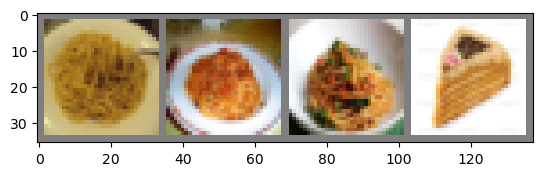

GroundTruth:  Pasta Pasta Pasta Cakes


In [232]:
dataiter = iter(testloader)
images, labels = next(dataiter)
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [233]:
outputs=[]
outputs = net(images)
_, predicted_labels = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted_labels[j]] for j in range(4)))

Predicted:  Pizza Pasta Pasta Cakes


In [234]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, groundtruth_labels = data
        outputs = net(images)
        _, predicted_labels = torch.max(outputs.data, 1)
        total += groundtruth_labels.size(0)
        correct += (predicted_labels == groundtruth_labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 71 %


In [235]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, groundtruth_labels = data
        outputs = net(images)
        _, predicted_labels = torch.max(outputs, 1)
        c = (predicted_labels == groundtruth_labels).squeeze()
        for i in range(len(groundtruth_labels)):
            label = groundtruth_labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(3):
    print('Accuracy of %5s : %2d %%' % (
    classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Cakes : 66 %
Accuracy of Pasta : 73 %
Accuracy of Pizza : 73 %


In [236]:
# Initialize class_correct and class_total
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# Initialize variables to store all ground truth and predicted labels
all_groundtruth_labels = []
all_predicted_labels = []

with torch.no_grad():
    for data in testloader:
        images, groundtruth_labels = data
        all_groundtruth_labels += groundtruth_labels
        outputs = net(images)
        _, predicted_labels = torch.max(outputs, 1)
        c = (predicted_labels == groundtruth_labels).squeeze()
        all_predicted_labels += predicted_labels
        for i in range(len(groundtruth_labels)):
            label = groundtruth_labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
# Calculate confusion matrix
confusion_matrix = np.zeros((3, 3), dtype=int)
for i in range(len(all_groundtruth_labels)):
    true_label = all_groundtruth_labels[i]
    predicted_label = all_predicted_labels[i]
    confusion_matrix[true_label][predicted_label] += 1

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[20  6  4]
 [ 2 22  6]
 [ 1  7 22]]


#### Task 3

In [181]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.dropout_conv = nn.Dropout2d(0.1)
        self.dropout_fc = nn.Dropout(0.1)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #x = self.conv1(x), x = F.relu(x), x = self.pool(x)
        x = self.dropout_conv(x)
        x = self.pool(F.relu(self.conv2(x))) #x = self.conv2(x), x = F.relu(x), x = self.pool(x)
        x = x.view(-1, 16 * 5 * 5) #flatten a 16x5x5 tensor to 16x5x5-dimensional vector
        x = F.relu(self.fc1(x))
        x = self.dropout_fc(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [170]:
PATH = './cifar_net.pth'
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

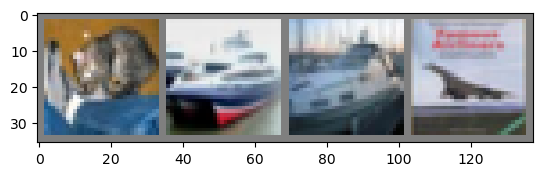

GroundTruth:    cat  ship  ship plane
Accuracy of the network on the 10000 test images: 52 %
Accuracy of plane : 63 %
Accuracy of   car : 72 %
Accuracy of  bird : 45 %
Confusion Matrix:
[[634  52  52  40  36   7  14  27  85  53]
 [ 50 701  27  34  19   6  24  25  33  81]
 [110  18 460 100  93  67  64  41  22  25]
 [ 50  40 123 382  88 113  84  53  25  42]
 [ 54  18 140 121 435  47  75  77  19  14]
 [ 28  14 123 247  72 332  37  96  21  30]
 [ 21  25 117 127  78  32 554  17  12  17]
 [ 46  19  85  86  78  52   9 570  15  40]
 [193  77  34  40  17   6  20  15 560  38]
 [ 61 164  41  44  17  14  20  41  63 535]]


In [172]:
dataiter = iter(testloader)
images, labels = next(dataiter)
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, groundtruth_labels = data
        outputs = net(images)
        _, predicted_labels = torch.max(outputs.data, 1)
        total += groundtruth_labels.size(0)
        correct += (predicted_labels == groundtruth_labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, groundtruth_labels = data
        outputs = net(images)
        _, predicted_labels = torch.max(outputs, 1)
        c = (predicted_labels == groundtruth_labels).squeeze()
        for i in range(len(groundtruth_labels)):
            label = groundtruth_labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(3):
    print('Accuracy of %5s : %2d %%' % (
    classes[i], 100 * class_correct[i] / class_total[i]))
# Initialize class_correct and class_total
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# Initialize variables to store all ground truth and predicted labels
all_groundtruth_labels = []
all_predicted_labels = []

with torch.no_grad():
    for data in testloader:
        images, groundtruth_labels = data
        all_groundtruth_labels += groundtruth_labels
        outputs = net(images)
        _, predicted_labels = torch.max(outputs, 1)
        c = (predicted_labels == groundtruth_labels).squeeze()
        all_predicted_labels += predicted_labels
        for i in range(len(groundtruth_labels)):
            label = groundtruth_labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
# Calculate confusion matrix
confusion_matrix = np.zeros((10, 10), dtype=int)
for i in range(len(all_groundtruth_labels)):
    true_label = all_groundtruth_labels[i]
    predicted_label = all_predicted_labels[i]
    confusion_matrix[true_label][predicted_label] += 1

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

#### Task 3.3

In [180]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.dropout_conv = nn.Dropout2d(0.1)
        self.dropout_fc = nn.Dropout(0.1)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #x = self.conv1(x), x = F.relu(x), x = self.pool(x)
        x = self.dropout_conv(x)
        x = self.pool(F.relu(self.conv2(x))) #x = self.conv2(x), x = F.relu(x), x = self.pool(x)
        x = x.view(-1, 16 * 5 * 5) #flatten a 16x5x5 tensor to 16x5x5-dimensional vector
        x = F.relu(self.fc1(x))
        x = self.dropout_fc(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
    def feature_extraction(self, x):
        x = self.pool(F.relu(self.conv1(x))) #x = self.conv1(x), x = F.relu(x), x = self.pool(x)
        x = self.pool(F.relu(self.conv2(x))) #x = self.conv2(x), x = F.relu(x), x = self.pool(x)
        x = x.view(-1, 16 * 5 * 5) #flatten a 16x5x5 tensor to 16x5x5-dimensional vector
        return x

In [416]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load the CIFAR-10 dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False)

# Initialize lists to store extracted features and ground truth labels
features = []
labels = []

# Extract features from the test set
with torch.no_grad():
    for data in testloader:
        inputs, groundtruth_labels = data
        extracted_features = net.feature_extraction(inputs)
        features.append(extracted_features.numpy())
        labels.append(groundtruth_labels.numpy())

# Flatten the extracted features and labels
features = np.vstack(features)
labels = np.hstack(labels)

# Split the data into training and testing sets
split_ratio = 0.8  # You can adjust this ratio
split_index = int(len(features) * split_ratio)

train_features, test_features = features[:split_index], features[split_index:]
train_labels, test_labels = labels[:split_index], labels[split_index:]

# Initialize and train an SVM classifier
svm_classifier = svm.SVC()
svm_classifier.fit(train_features, train_labels)

# Make predictions on the test set using SVM
svm_predictions = svm_classifier.predict(test_features)

# Calculate accuracy using SVM
svm_accuracy = accuracy_score(test_labels, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

# Initialize and train an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50)
adaboost_classifier.fit(train_features, train_labels)

# Make predictions on the test set using AdaBoost
adaboost_predictions = adaboost_classifier.predict(test_features)

# Calculate accuracy using AdaBoost
adaboost_accuracy = accuracy_score(test_labels, adaboost_predictions)
print("AdaBoost Accuracy:", adaboost_accuracy)

Files already downloaded and verified
SVM Accuracy: 0.579
AdaBoost Accuracy: 0.368
